In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.array([7,5,8,7,2,12,5,9,4,11,19,9,10])
y = np.array([90,86,87,88,100,86,103,97,94,78,77,55,86])

In [10]:
# Preprocess y for binary classification (threshold at median)
threshold = np.median(y)
y_binary = (y <= threshold).astype(int)  # 1 if y <= median, else 0


In [11]:
# Optionally shuffle data
indices = np.arange(len(x))
np.random.seed(42)
np.random.shuffle(indices)
x, y_binary = x[indices], y_binary[indices]

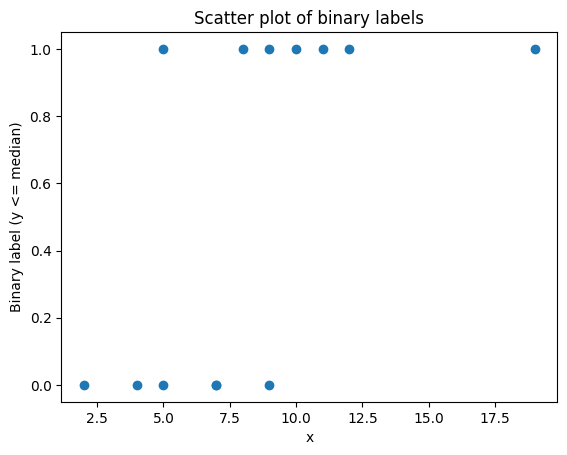

In [12]:
# Visualize raw binary data
plt.scatter(x, y_binary)
plt.xlabel('x')
plt.ylabel('Binary label (y <= median)')
plt.title("Scatter plot of binary labels")
plt.show()

In [13]:
# Logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:
def y_pred(slope, intercept, x):
    return sigmoid(intercept + slope * x)

In [15]:
def cost(x, y, slope, intercept):
    n = len(x)
    total_cost = 0
    for i in range(n):
        p = y_pred(slope, intercept, x[i])
        # Clip predicted values for numerical stability
        p = np.clip(p, 1e-10, 1-1e-10)
        total_cost += - (y[i] * np.log(p) + (1 - y[i]) * np.log(1 - p))
    return total_cost / n

In [16]:
def err_intercept(x, y, slope, intercept):
    n = len(x)
    sum_err = 0
    for i in range(n):
        p = y_pred(slope, intercept, x[i])
        sum_err += (p - y[i])
    return sum_err

In [17]:
def err_slope(x, y, slope, intercept):
    n = len(x)
    sum_err = 0
    for i in range(n):
        p = y_pred(slope, intercept, x[i])
        sum_err += (p - y[i]) * x[i]
    return sum_err

In [18]:
def gradient_descent(x, y, lr=0.05, epochs=1000):
    slope = 0.0
    intercept = 0.0
    cost_history = []
    for epoch in range(epochs):
        intercept -= lr * err_intercept(x, y, slope, intercept) / len(x)
        slope -= lr * err_slope(x, y, slope, intercept) / len(x)
        c = cost(x, y, slope, intercept)
        cost_history.append(c)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: slope={slope:.4f}, intercept={intercept:.4f}, cost={c:.4f}")
    return slope, intercept, cost_history

In [19]:
# Train logistic regression
slope, intercept, cost_history = gradient_descent(x, y_binary)


Epoch 0: slope=0.0767, intercept=0.0019, cost=0.6362
Epoch 100: slope=0.1306, intercept=-0.5083, cost=0.5839
Epoch 200: slope=0.1763, intercept=-0.9266, cost=0.5487
Epoch 300: slope=0.2156, intercept=-1.2761, cost=0.5242
Epoch 400: slope=0.2497, intercept=-1.5732, cost=0.5064
Epoch 500: slope=0.2795, intercept=-1.8295, cost=0.4932
Epoch 600: slope=0.3058, intercept=-2.0535, cost=0.4831
Epoch 700: slope=0.3292, intercept=-2.2511, cost=0.4753
Epoch 800: slope=0.3501, intercept=-2.4270, cost=0.4690
Epoch 900: slope=0.3690, intercept=-2.5846, cost=0.4640


In [20]:
# Predictions
yp = y_pred(slope, intercept, x)
y_pred_final = (yp >= 0.5).astype(int)

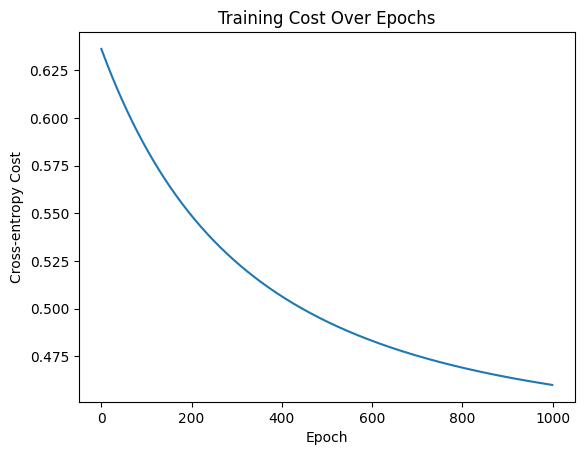

In [21]:
# Plot training cost (convergence)
plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy Cost")
plt.title("Training Cost Over Epochs")
plt.show()

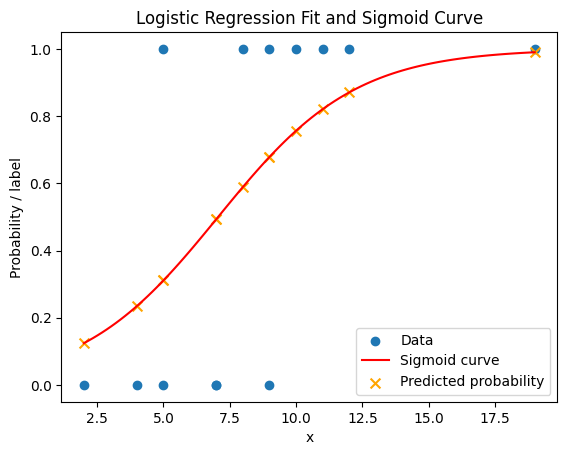

In [22]:
# Plot data and sigmoid curve (for all x, not just discrete points)
x_sorted = np.linspace(np.min(x), np.max(x), 100)
yp_curve = y_pred(slope, intercept, x_sorted)
plt.scatter(x, y_binary, label='Data')
plt.plot(x_sorted, yp_curve, 'r-', label='Sigmoid curve')
plt.scatter(x, yp, color='orange', label='Predicted probability', s=50, marker='x')
plt.xlabel('x')
plt.ylabel('Probability / label')
plt.legend()
plt.title("Logistic Regression Fit and Sigmoid Curve")
plt.show()

In [24]:
accuracy = np.mean(y_pred_final == y_binary)
print(f"Final model accuracy: {accuracy:.2f}")

Final model accuracy: 0.85


In [25]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n", confusion_matrix(y_binary, y_pred_final))

Confusion matrix:
 [[5 1]
 [1 6]]
